# Application of Machine Learning Techniques for Dementia Severity Prediction from Psychometric Tests in the Elderly Population.

**Autor**
* Juan Bekios Calfa

**Dataset**:
* 14 atributos R0-R5.sav

**Problema**: 

**Método**: El problema tiene que descomponerse en las siguientes etapas.
1. Descripción del problema y objetivos.
2. Recolección de datos.
3. Procesamiento de los datos.
4. Exploración/Visualización.
5. Análisis/Aprendizaje automático.
6. Resultados.
7. Conclusiones.

#Problema

Construir un clasificador KNN para probar diferentes configuraciones de base de datos entre atributos de entrada entregados por ACE-III y etiquetas datas por difenretes codificaciones de GDS.

Se probará atributos de entrada ACE-III con 24 y 15 características de entrada. Las base de datos son:

*  ff
*  fdf

Cada base de datos contiene diferentes codificaciones de la variable de salida GDS:

* GDS: 7 clases
* GDS_R1:
* GDS_R2:
* GDS_R3:
* GDS_R4:
* GDS_R5:

# 1. Configuración
 
 Instalamos librerías y dependencias necesarias.

In [ ]:
# Cargamos las librerías para cargar archivos spss
!pip install pyreadstat
# Librerías para leer archivos json con comentarios
!pip install commentjson
# Cargar librerias para crear documentos word
!pip install python-docx
# Cargar librerías para balace de datos
!pip install -U imbalanced-learn

Cargamos librerias estándar de Python

In [ ]:
# Manipular archivos json con comentarios
import commentjson
# Se importa la librería pandas para hacer lectura de los datos como DataFrame.
import pandas as pd
# Librerias para trabajar con colecciones de datos
import collections
# Librerias para mostrar gráficos
import matplotlib.pyplot as plt
# Librerias para manejar matrices
import numpy as np

Configuración del proyecto

In [ ]:
# Configuración del experimento
base_datos = '15 atributos R0-R5.sav'
numero_atributos_entrada = 15

str_config = f"""{{
  \"archivo\": \"{base_datos}\", //Base de datos ACEII-GDS}}
  \"titulo_experimento\": \"ACEIII-GDS [15 atributos]\",  // Título gráfico
  \"num_atrib_entrada\": {numero_atributos_entrada},  // Número de atributos de entrada
  \"codificacion\": [\"GDS\", \"GDS_R1\", \"GDS_R2\", \"GDS_R3\", \"GDS_R4\", \"GDS_R5\"]  // Distintos tipos de codificaciones GDS
}}
"""

# Obtengo un diccionario con los parámetros para cargar la base de datos
config = commentjson.loads(str_config)

# 2. Carga de los datos

Montar unidad con Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd ##PATH where the dataset is located##

In [ ]:
# Lectura de los datos desde un archivo SPSS y su almacenamiento en un DataFrame.
df = pd.read_spss(config['archivo'])
df.head()

ID  Día  Mes  Año  Estación  País  Ciudad  CalleLugar  NumeroPiso  \
0  1.0  1.0  1.0  1.0       1.0   1.0     1.0         1.0         1.0   
1  2.0  1.0  1.0  1.0       1.0   1.0     1.0         1.0         1.0   
2  3.0  1.0  1.0  1.0       1.0   1.0     1.0         1.0         1.0   
3  4.0  1.0  1.0  1.0       0.0   1.0     1.0         1.0         1.0   
4  5.0  1.0  1.0  1.0       1.0   1.0     1.0         1.0         1.0   

   Miguel2  ...  Imperial2  A682  Caldera2  Copiapo2  GDS  GDS_R1  GDS_R2  \
0      0.0  ...        0.0   0.0       0.0       1.0  3.0     1.0     2.0   
1      0.0  ...        0.0   0.0       0.0       0.0  1.0     1.0     1.0   
2      1.0  ...        1.0   1.0       1.0       1.0  1.0     1.0     1.0   
3      1.0  ...        0.0   1.0       1.0       0.0  2.0     1.0     1.0   
4      0.0  ...        0.0   0.0       0.0       0.0  2.0     1.0     1.0   

   GDS_R3  GDS_R4  GDS_R5  
0     1.0     2.0     2.0  
1     1.0     1.0     1.0  
2     1.0     1.0     1.0  
3     1.0     2.0     2.0  
4     1.0     2.0     2.0  

[5 rows x 22 columns]

#3. Procesamiento de los datos

Sobre los datos originales se procesará:

1. Eliminar los registros que tengan datos _missing_.
2. Construir un _dataframe_ solo con las variables predictoras o variables de entrada.
3. Construir un _dataframe_ solo con las variables de salida.
4. Separar el conjunto de datos en entrenamiento y pruebas.

### 3.1 Eliminar los registros que tengan datos _missing_

In [ ]:
# Numero de filas actuales
num_current = df.shape[0]
# Eliminar las filas que tengan valores perdidos
df_drop = df.dropna(axis=0)
# Calcular el número de filas que quedan
num_with_drop = df_drop.shape[0]

# Imprimir los valores de filas actuales vs las filas eliminadas
print(f'Número de filas originales: {num_current}')
print(f'Número de filas nuevo dataframe: {num_with_drop}')
print(f'Número de filas eliminadas: {num_current - num_with_drop}')

Número de filas originales: 1119
Número de filas nuevo dataframe: 1119
Número de filas eliminadas: 0


## 3.2 Corregir fallas de la base de datos

1.  GDS_R3: Tiene etiquetas 1 y 3, y debe ser 1 y 2.
2.  GDS : Fusionar todas las clases 6 y 7 en 6.

In [ ]:
# 1. GDS_R3: Tiene etiquetas 1 y 3, y debe ser 1 y 2.
df['GDS_R3'] = np.where(df['GDS_R3'] == 3.0, 2.0, df['GDS_R3'])

# 2. GDS : Fusionar todas las clases 6 y 7 en 6.
df['GDS'] = np.where(df['GDS'] == 7.0, 6.0, df['GDS'])

## 3.3 Construir un _dataframe_ solo con las variables predictoras o variables de entrada

Las columnas GDS, GDS_R1, GDS_R2 y GDS_R3 son diferentes codificaciones de las variables clase. 

Se creará un _dataframe_ solo con las variables preditoras.

In [ ]:
# Lista de variables de salida
list_var_dependientes = config['codificacion']

# Selecciono las variables predictoras
df_features = df.drop(list_var_dependientes + ['ID'], axis=1)
#df_atributos = df_atributos.drop(['ID'], axis=1)
df_features.head()

Día  Mes  Año  Estación  País  Ciudad  CalleLugar  NumeroPiso  Miguel2  \
0  1.0  1.0  1.0       1.0   1.0     1.0         1.0         1.0      0.0   
1  1.0  1.0  1.0       1.0   1.0     1.0         1.0         1.0      0.0   
2  1.0  1.0  1.0       1.0   1.0     1.0         1.0         1.0      1.0   
3  1.0  1.0  1.0       0.0   1.0     1.0         1.0         1.0      1.0   
4  1.0  1.0  1.0       1.0   1.0     1.0         1.0         1.0      0.0   

   González2  Avenida2  Imperial2  A682  Caldera2  Copiapo2  
0        0.0       0.0        0.0   0.0       0.0       1.0  
1        0.0       0.0        0.0   0.0       0.0       0.0  
2        1.0       1.0        1.0   1.0       1.0       1.0  
3        1.0       1.0        0.0   1.0       1.0       0.0  
4        0.0       0.0        0.0   0.0       0.0       0.0

##3.4 Construir un _dataframe_ solo con las variables de salida

Las columnas GDS, GDS_R1, GDS_R2, GDS_R3, etc. son diferentes codificaciones de las variables clase. 

Se creará un _dataframe_ con las distintas variables clase. Cada columna representa un tipo de codificación diferente.

In [ ]:
# Creo dataframe con las variables de salida
df_labels = df[list_var_dependientes]

df_labels.head()

GDS  GDS_R1  GDS_R2  GDS_R3  GDS_R4  GDS_R5
0  3.0     1.0     2.0     1.0     2.0     2.0
1  1.0     1.0     1.0     1.0     1.0     1.0
2  1.0     1.0     1.0     1.0     1.0     1.0
3  2.0     1.0     1.0     1.0     2.0     2.0
4  2.0     1.0     1.0     1.0     2.0     2.0

### 3.5 Codificación GDS


In [ ]:
for cod_gds in config['codificacion']:
  print(f'{cod_gds} Labels: {np.unique(df_labels[cod_gds])}')

GDS Labels: [1. 2. 3. 4. 5. 6.]
GDS_R1 Labels: [1. 2. 3.]
GDS_R2 Labels: [1. 2. 3.]
GDS_R3 Labels: [1. 2.]
GDS_R4 Labels: [1. 2. 3.]
GDS_R5 Labels: [1. 2. 3.]


# 4. Visualización y exploración de datos

Cantidad de datos por clase.

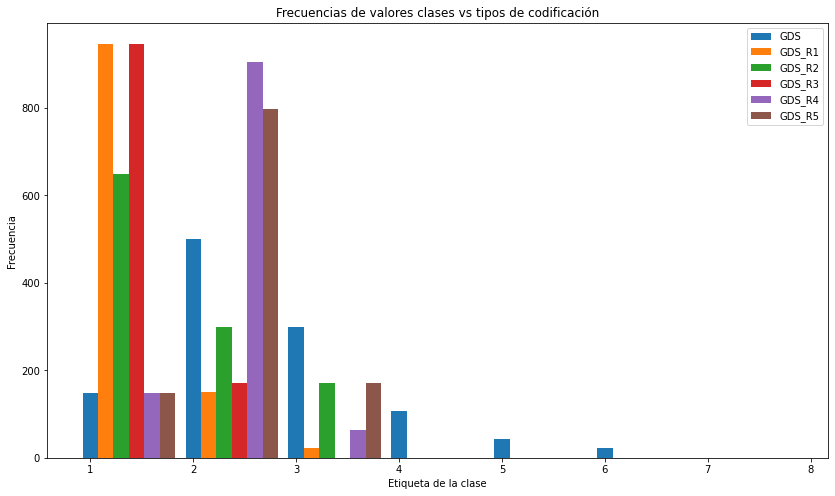

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

experiments = config['codificacion']
width = 0.15
sum_width = 0
plt.figure(figsize=(14, 8))
for exp in experiments:
  ctr = collections.Counter(list(df_labels[exp]))
  data = [ctr[i] for i in range(1,8)]
  plt.bar((np.arange(1, len(data)+1))+sum_width, data, width=width, label=exp)
  sum_width += width

plt.title('Frecuencias de valores clases vs tipos de codificación')
plt.xlabel('Etiqueta de la clase')
plt.ylabel('Frecuencia')
plt.legend()

#5. Crear modelos

# Pruebas sobre todas las codificaciones

In [ ]:
from sklearn.model_selection import train_test_split
import collections
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import pickle
from IPython.display import clear_output
# Separar el conjunto de entrenamiento y pruebas (estratificado)
from sklearn.model_selection import train_test_split
#from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE 
from copy import deepcopy

# Probar todas las etiquetas
params = {
    'n_neighbors': list(range(1, 30)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1': make_scorer(f1_score, average = 'macro')}

dict = {}

print(dict)

for codificacion_gds in df_labels.keys():

  X = df_features.to_numpy()
  y = list(df_labels[codificacion_gds].astype('string'))
  print(f"Codificación GDS: {codificacion_gds}")

  # Separar el conjunto de entrenamiento y pruebas (estratificado)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=0)
  # Elementos del clase de cada conjunto
  
  # Aumento los datos  para que queden balanceados
  sm = SMOTE(random_state=0, n_jobs=-1)
  X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

  ctr_train = collections.Counter(y_train_bal)
  print(f'Frecuencia de los elementos en la lista - Conjunto de entrenamiento: {ctr_train}')
  print(f'Cantidad total de elementos del conjunto de entrenamieto: {len(y_train_bal)}')
  print()

  ctr_test = collections.Counter(y_test)
  print(f'Frecuencia de los elementos en la lista - Conjunto de pruebas: {ctr_test}')
  print(f'Cantidad total de elementos del conjunto de pruebas: {len(y_test)}')

  loo = LeaveOneOut()
  knn = KNeighborsClassifier()

  clf = GridSearchCV(estimator=knn, param_grid=params, cv=loo, scoring=scoring, refit='precision', verbose=0, return_train_score=False)
  clf.fit(X_train_bal, y_train_bal)

  dict[codificacion_gds] = (deepcopy(clf), ctr_train, len(y_train_bal), ctr_test, len(y_test))
  clear_output()
  print(dict)

  print("="*50)
  print(clf.best_score_)
  print(clf.best_params_)
  print("="*50)

with open('saved_det_con_balance-15att.pkl', 'wb') as f:
  pickle.dump(dict, f)

In [ ]:
from sklearn.metrics import classification_report
import seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle
 
with open('saved_det_con_balance-15att.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

print(loaded_dict)

def plot_confusion_matrix(data, labels, output_filename):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(12, 8))
 
    plt.title("Confusion Matrix")
 
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'}, fmt='g') # or d
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
 
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.close()

for codificacion_gds in df_labels.keys():
  X = df_features.to_numpy()
  y = list(df_labels[codificacion_gds].astype('string'))
  print(f"Codificación GDS: {codificacion_gds}")

  # Separar el conjunto de entrenamiento y pruebas (estratificado)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=0)

  # Elementos del clase de cada conjunto
  print("="*50)
  print(f'Codificación GDS: {codificacion_gds}')
  print(f'Mejor puntuación: {loaded_dict[codificacion_gds][0].best_score_}')
  print(f'Mejores hiperparámetors: {loaded_dict[codificacion_gds][0].best_params_}')
  print(f'Frecuencia conjunto de entrenamiento: {loaded_dict[codificacion_gds][1]}')
  print(f'Cantidad de elementos conjunto de entrenamiento: {loaded_dict[codificacion_gds][2]}')
  print(f'Frecuencia conjunto de pruebas: {loaded_dict[codificacion_gds][3]}')
  print(f'Cantidad de elementos : {loaded_dict[codificacion_gds][4]}')
  
  clf = loaded_dict[codificacion_gds][0]
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred, target_names=clf.classes_))
  print()

  output_filename = f'confusion-matrix-con-balance-precision-{codificacion_gds}.png'
  cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
  plot_confusion_matrix(cm, clf.classes_, output_filename)

  print("="*50) 